<a href="https://colab.research.google.com/github/merlynmp/Airplane-Sentiment-Analysis/blob/main/Airline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Tweets.xlsx')

In [ ]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada)
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada)
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.dtypes

,0
tweet_id,int64
airline_sentiment,object
airline_sentiment_confidence,float64
negativereason,object
negativereason_confidence,float64
airline,object
airline_sentiment_gold,object
name,object
negativereason_gold,object
retweet_count,int64


In [ ]:
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [ ]:
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,NaN,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",NaN,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,NaN,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,2015-02-21 11:33:24.781216,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-16 23:36:05,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-19 15:54:05.750000128,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-22 04:44:35.500000,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-23 08:04:11,NaN,NaN
max,5.703106e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,2015-02-24 11:53:37,NaN,NaN


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='airline', ylabel='count'>

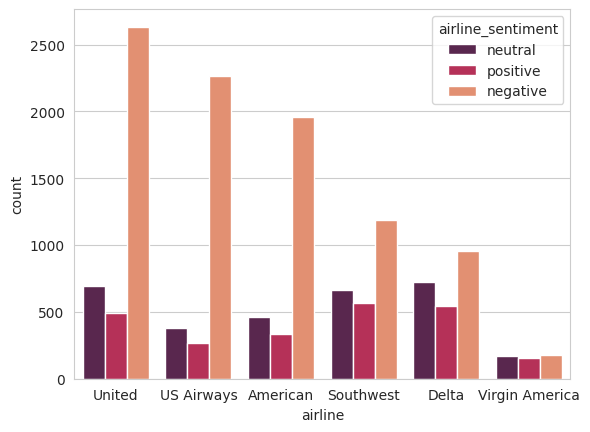

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'airline', palette = 'rocket', hue = 'airline_sentiment', order = df['airline'].value_counts().index)

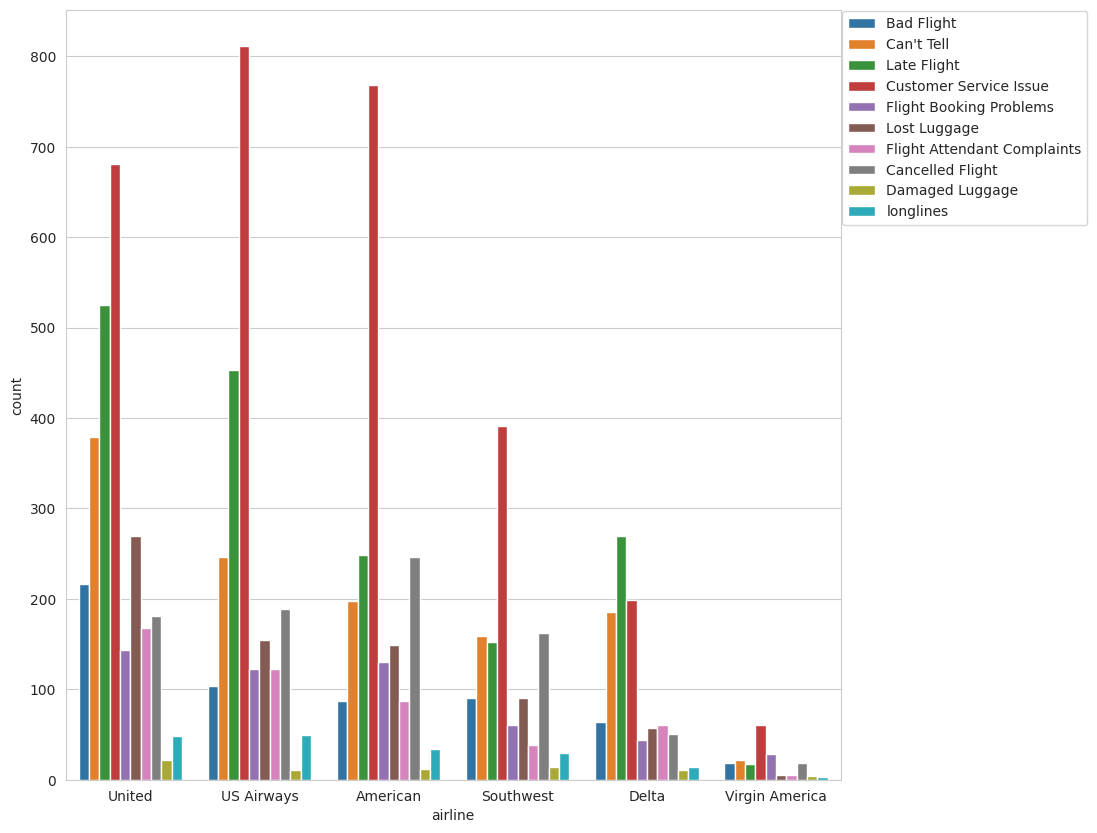

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'airline', hue = 'negativereason', order = df['airline'].value_counts().index)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0.1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Customer Service Issue'),
  Text(1, 0, 'Late Flight'),
  Text(2, 0, "Can't Tell"),
  Text(3, 0, 'Cancelled Flight'),
  Text(4, 0, 'Lost Luggage'),
  Text(5, 0, 'Bad Flight'),
  Text(6, 0, 'Flight Booking Problems'),
  Text(7, 0, 'Flight Attendant Complaints'),
  Text(8, 0, 'longlines'),
  Text(9, 0, 'Damaged Luggage')])

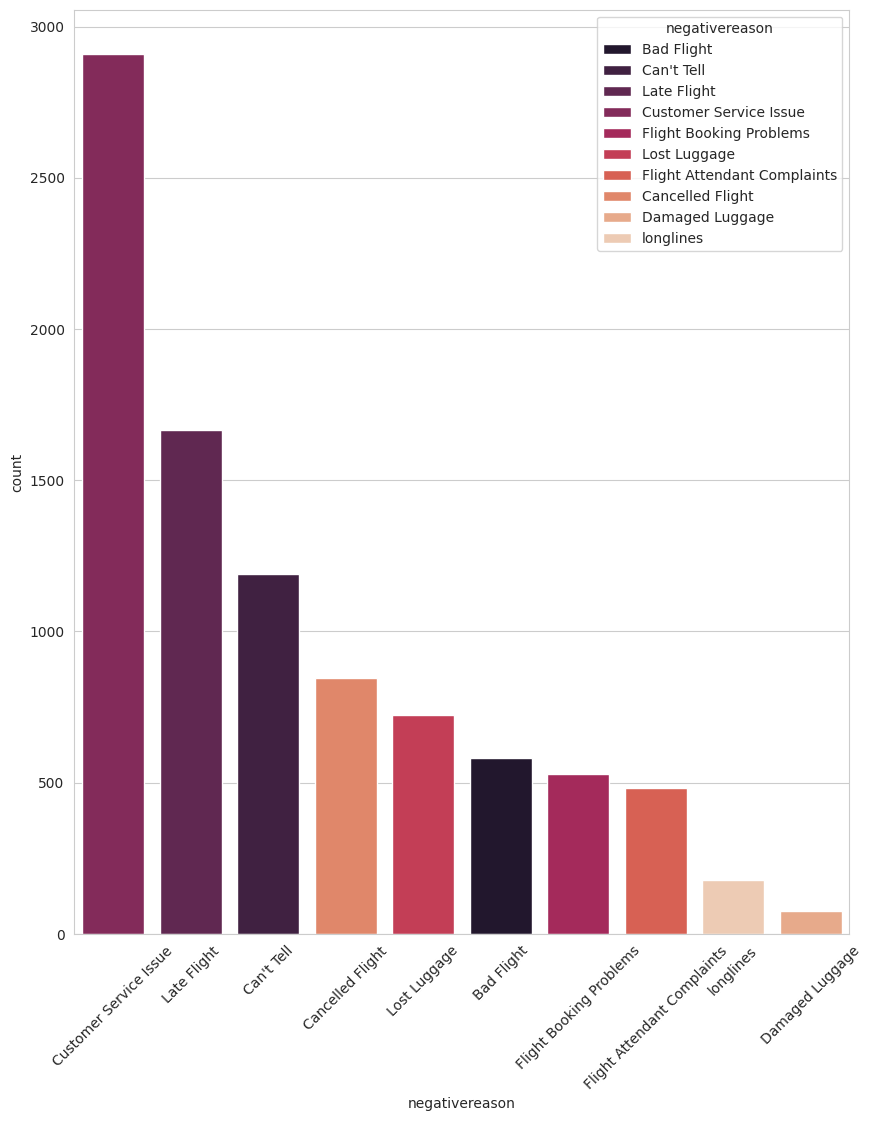

In [ ]:
plt.figure(figsize = (10,12))
sns.countplot(data = df, x = 'negativereason', hue = 'negativereason', palette = 'rocket', order = df['negativereason'].value_counts().index)
plt.xticks(rotation = 45)

# Processing text

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer as Stemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
processed_text_list = []

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def processing_text(text):

  # converts string to lowercase
  text = text.lower()

  # removes @
  text = re.sub(r'@[A-Za-z0-9]+', '', text)

  # removes header
  text = re.sub(r'https://[A-Za-z0-9]+', '', text)

  # removies emojis
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

  text = regrex_pattern.sub(r'', text)

  # remove special character
  text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)

  # removing commonly used words
  stopWords = set(stopwords.words('english'))

  stopWords_extend = ["not", "no", "won't", "isn't", "couldn't", "wasn't", "didn't", "shouldn't",
"hasn't", "wouldn't", "haven't", "weren't", "hadn't", "shan't", "doesn't",
"mightn't", "mustn't", "needn't", "don't", "aren't", "won't"]

  text = text.split()

  text = ' '.join([j for j in text if (j not in stopwords.words('english') or j in stopWords_extend)])

  # removes punctuation
  text = ''.join([j for j in text if j not in string.punctuation])

  # removes digits
  text = ''.join([j for j in text if not j.isdigit()])

  #stemmization
  text = word_tokenize(str(text))
  st = Stemmer()
  text = text = [st.stem(j) for j in text]
  text = ' '.join(text)

  #lemmatization
  wnt = WordNetLemmatizer().lemmatize
  text = word_tokenize(str(text))
  pos_word = pos_tag(text)
  lemm_words = [wnt(sw[0], get_wordnet_pos(sw[1])) for sw in pos_word]
  text = ' '.join(lemm_words)

  return text

In [ ]:
  for i in df['text']:
    processed_text_list.append(processing_text(i))

In [ ]:
df['processed_text'] = processed_text_list

In [ ]:
df.to_csv('/content/drive/MyDrive/merlynpothen_workshop3.csv', index=False)

In [ ]:
df.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),say
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plu youv ad commerci experi tacki
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),didnt today must mean need take anoth trip
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),realli aggress blast obnoxi entertain guest fa...
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),realli big bad thing
5,570300767074180992,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada),serious would pay flight seat didnt play reall...
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada),ye nearli everi time fli vx ear worm wont go away
7,570300248553348992,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada),realli miss prime opportun men without hat par...
8,570299953286942016,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada),well didntbut
9,570295459631262976,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada),amaz arriv hour earli your good me


In [ ]:
from IPython.display import HTML
HTML (df.head().to_html())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),say
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plu youv ad commerci experi tacki
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),didnt today must mean need take anoth trip
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),realli aggress blast obnoxi entertain guest face amp littl recours
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),realli big bad thing


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Undersampling/Oversampling data


In [ ]:
df['label'] = df['airline_sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})

df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text,label
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),say,0
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plu youv ad commerci experi tacki,1
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),didnt today must mean need take anoth trip,0
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),realli aggress blast obnoxi entertain guest fa...,-1
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),realli big bad thing,-1


In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df, df['label'], test_size = 0.1, random_state = 101)

In [ ]:
print('Train dataset', train_X.shape)
print('Test dataset', test_X.shape)

Train dataset (13176, 17)
Test dataset (1464, 17)


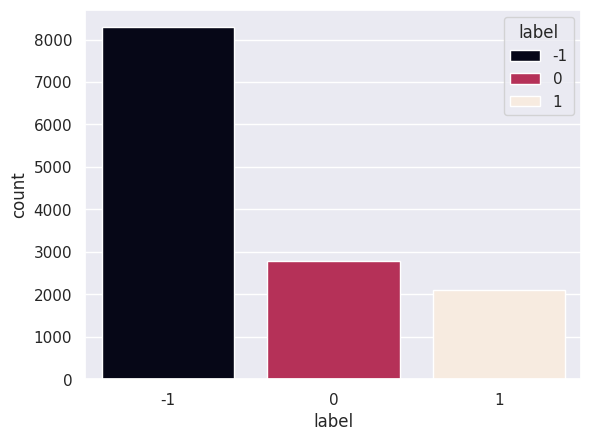

In [ ]:
sns.set(style='darkgrid')
sns.countplot(x = 'label', data = train_X, order= train_X['label'].value_counts().index, hue = 'label', palette = 'rocket')
plt.show()

In [ ]:
train_X['label'].value_counts()

,count
label,
-1,8289
0,2782
1,2105


In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [ ]:
def undersample(train_X):
  df_neg = train_X[train_X['label'] == -1]
  df_neu = train_X[train_X['label'] == 0]
  df_pos = train_X[train_X['label'] == 1]
  lowest_count = len(df_pos)

  #undersample negative and neutral data
  df_neg_lower = resample(df_neg, replace = True, n_samples = lowest_count, random_state = 1000)

  df_neu_lower = resample(df_neu, replace = True, n_samples = lowest_count, random_state = 1000)

  trainX = pd.concat([df_neg_lower, df_neu_lower, df_pos])
  print("Train dataset calss distribution: \n", trainX.label.value_counts())
  trainX = shuffle(trainX, random_state = 200)
  return trainX

In [ ]:
def oversample(train_X):
  df_neg = train_X[train_X['label'] == -1]
  df_neu = train_X[train_X['label'] == 0]
  df_pos = train_X[train_X['label'] == 1]
  high_count = len(df_neg)

  #oversample positive and neutral data
  df_pos_over = resample(df_pos, replace = True, n_samples = high_count, random_state = 1000)

  df_neu_over = resample(df_neu, replace = True, n_samples = high_count, random_state = 1000)

  trainX = pd.concat([df_neg, df_neu_over, df_pos_over])
  print("Train dataset calss distribution: \n", trainX.label.value_counts())
  trainX = shuffle(trainX, random_state = 200)
  return trainX

# Model functions


In [ ]:
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def airline_NB(df, feature, ngram, sample):
  random.seed(1234567)

  if feature == "TF":
    vector = CountVectorizer(analyzer = 'word', ngram_range=(1, ngram))
  elif feature == "TFIDF":
    vector = TfidfVectorizer(analyzer = 'word', ngram_range = (1,ngram))

  train_X, test_X, train_y, test_y = train_test_split(df, df['label'], test_size = 0.1, random_state = 101)

  if sample == "undersampling":
    train_X = undersample(train_X)

  elif sample == "oversampling":
    train_X = oversample(train_X)

  pipe = make_pipeline(vector, MultinomialNB(alpha = 1.0, fit_prior = True))
  clf = pipe.fit(train_X['processed_text'], train_X['label'])

  test_y_hat = pipe.predict(test_X['processed_text'])

  df_result = test_X.copy()
  df_result['prediction'] = test_y_hat.tolist()

  df_prob = pd.DataFrame(pipe.predict_proba(test_X['processed_text']), columns = pipe.classes_)
  df_prob.index = df_result.index
  df_prob.columns = ['probability_negative', 'Probability_neutral', 'probability_positive']

  df_final = pd.concat([df_result, df_prob], axis = 1)

  file_name = 'NB_' + str(ngram) + '_' + sample
  df_final.to_csv(file_name + '.csv')
  df.to_csv('/content/drive/MyDrive/test_airline.csv', index=False)

  print("-----------------------------------------")
  print("NB classification report -- ", "feature: %s/" %feature, "ngram: %d/" %ngram, "sample_method: %s/" %sample)
  print(pd.crosstab(test_y.to_numpy(), test_y_hat, rownames = ['True'], colnames = ['Predicted'], margins = True))

  print("-----------------------------------------")
  print(classification_report(test_y, test_y_hat))
  print('Macro F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'macro')))
  print('Weighted F1 Score: {:.2f}'.format(f1_score(test_y_hat, test_y, average = 'weighted')))




In [ ]:
airline_NB(df, "TF", 1, "none")
airline_NB(df, "TF", 1, "oversampling")
airline_NB(df, "TF", 1, "undersampling")

airline_NB(df, "TFIDF", 2, "none")
airline_NB(df, "TFIDF", 2, "oversampling")
airline_NB(df, "TFIDF", 2, "undersampling")

airline_NB(df, "TFIDF", 3, "none")
airline_NB(df, "TFIDF", 3, "oversampling")
airline_NB(df, "TFIDF", 3, "undersampling")

-----------------------------------------
NB classification report --  feature: TF/ ngram: 1/ sample_method: none/
Predicted    -1    0    1   All
True                           
-1          853   25   11   889
0           186  114   17   317
1            91   24  143   258
All        1130  163  171  1464
-----------------------------------------
              precision    recall  f1-score   support

          -1       0.75      0.96      0.84       889
           0       0.70      0.36      0.48       317
           1       0.84      0.55      0.67       258

    accuracy                           0.76      1464
   macro avg       0.76      0.62      0.66      1464
weighted avg       0.76      0.76      0.73      1464

Macro F1 Score: 0.66
Weighted F1 Score: 0.78
Train dataset calss distribution: 
 label
-1    8289
 0    8289
 1    8289
Name: count, dtype: int64
-----------------------------------------
NB classification report --  feature: TF/ ngram: 1/ sample_method: oversampling/
P

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
#logistic regression
def airline_lr(df, ngram):

  tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,ngram))

  train_X, test_X, train_y, test_y = train_test_split(df['processed_text'], df['label'], test_size = 0.1, random_state = 101)

  tfidf_vectorizer.fit(train_X)

  X_train_tfidf = tfidf_vectorizer.transform(train_X)

  X_test_tfidf = tfidf_vectorizer.transform(test_X)

  param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'max_iter' : [500, 600, 700, 800]}

  lr_model = LogisticRegression(C = 10, max_iter = 500)

  lr_model.fit(X_train_tfidf, train_y)

  lr_label_predictions = lr_model.predict(X_test_tfidf)

  print('the classification report for ' + str(ngram) + " ngrams is ")

  print(classification_report(test_y, lr_label_predictions))

In [ ]:
airline_lr(df, 1)

airline_lr(df, 2)

airline_lr(df, 3)

  (0, 10212)	0.24382498491208887
  (0, 8415)	0.3259240067352978
  (0, 7064)	0.3237073290193715
  (0, 6506)	0.1472015283103538
  (0, 6125)	0.34232393186981513
  (0, 4899)	0.3391213009527119
  (0, 3671)	0.32826056175643464
  (0, 3363)	0.2024272746092472
  (0, 2312)	0.31582816787552703
  (0, 1885)	0.1634868783592633
  (0, 1655)	0.36330551180149107
  (0, 1583)	0.26168908812331204
  (1, 5725)	0.635727498397632
  (1, 5202)	0.565475460141053
  (1, 3593)	0.5254408166095903
  (2, 8660)	0.23170483010050918
  (2, 6506)	0.1845021370310902
  (2, 6352)	0.5084946110841022
  (2, 5828)	0.2741518929841415
  (2, 3843)	0.19487253874747187
  (2, 1505)	0.5304572504998709
  (2, 1208)	0.42505404296225574
  (2, 632)	0.2802046802006838
  (3, 7124)	0.335996875411158
  (3, 6652)	0.26183656741318817
  :	:
  (13171, 5566)	0.45543401087877566
  (13171, 2968)	0.26672537339510466
  (13171, 2927)	0.32920829738554286
  (13171, 498)	0.4535371486298528
  (13172, 8132)	0.42494443488867994
  (13172, 5287)	0.6989880448129671

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random forest
def airline_rf(df, ngram):

  tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,ngram))

  train_X, test_X, train_y, test_y = train_test_split(df['processed_text'], df['label'], test_size = 0.1, random_state = 101)

  tfidf_vectorizer.fit(train_X)

  X_train_tfidf = tfidf_vectorizer.transform(train_X)

  X_test_tfidf = tfidf_vectorizer.transform(test_X)

  rf_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100)

  rf_model.fit(X_train_tfidf, train_y)

  rf_predictions = rf_model.predict(X_test_tfidf)

  print('the classification report for ' + str(ngram) + " ngrams is ")

  print(classification_report(test_y, rf_predictions))



In [ ]:
airline_rf(df, 1)

airline_rf(df, 2)

the classification report for 1 ngrams is 
              precision    recall  f1-score   support

          -1       0.77      0.94      0.85       889
           0       0.64      0.43      0.52       317
           1       0.81      0.53      0.64       258

    accuracy                           0.76      1464
   macro avg       0.74      0.64      0.67      1464
weighted avg       0.75      0.76      0.74      1464

the classification report for 2 ngrams is 
              precision    recall  f1-score   support

          -1       0.79      0.93      0.85       889
           0       0.61      0.47      0.53       317
           1       0.83      0.55      0.66       258

    accuracy                           0.76      1464
   macro avg       0.74      0.65      0.68      1464
weighted avg       0.76      0.76      0.75      1464



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#decision tree
def airline_dt(df, ngram):

  tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,ngram))

  train_X, test_X, train_y, test_y = train_test_split(df['processed_text'], df['label'], test_size = 0.1, random_state = 101)

  tfidf_vectorizer.fit(train_X)

  X_train_tfidf = tfidf_vectorizer.transform(train_X)

  X_test_tfidf = tfidf_vectorizer.transform(test_X)

  dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 16, min_samples_leaf = 25)

  dt_model.fit(X_train_tfidf, train_y)

  dt_predictions = dt_model.predict(X_test_tfidf)

  print('the classification report for ' + str(ngram) + " ngrams is ")

  print(classification_report(test_y, dt_predictions))


In [ ]:
airline_dt(df, 1)

airline_dt(df, 2)

airline_dt(df, 3)

the classification report for 1 ngrams is 
              precision    recall  f1-score   support

          -1       0.68      0.97      0.80       889
           0       0.00      0.00      0.00       317
           1       0.68      0.52      0.59       258

    accuracy                           0.68      1464
   macro avg       0.45      0.50      0.46      1464
weighted avg       0.53      0.68      0.59      1464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the classification report for 2 ngrams is 
              precision    recall  f1-score   support

          -1       0.68      0.95      0.79       889
           0       0.67      0.01      0.02       317
           1       0.65      0.55      0.60       258

    accuracy                           0.68      1464
   macro avg       0.67      0.51      0.47      1464
weighted avg       0.67      0.68      0.59      1464

the classification report for 3 ngrams is 
              precision    recall  f1-score   support

          -1       0.68      0.94      0.79       889
           0       0.67      0.02      0.04       317
           1       0.62      0.57      0.59       258

    accuracy                           0.67      1464
   macro avg       0.66      0.51      0.47      1464
weighted avg       0.67      0.67      0.59      1464

